In [1]:
# setup
import numpy as np
import gzip
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
def set_binary_labels_by_digit(labels_in, digit):
    d = np.zeros((labels_in.shape[0],1))

    for i in range(labels_in.shape[0]):
        if labels_in[i] == digit:
            d[i] = 1
        else:
            d[i] = -1
    
    return d


# Data Imports

In [3]:
# specify size of images
image_rows = 28
image_cols = 28

## Training data and labels

In [4]:
# open training set image file
f = gzip.open('train-images-idx3-ubyte.gz','r')

num_train_images = 60000

f.read(16)
buf = f.read(image_rows * image_cols * num_train_images)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train_images, image_rows, image_cols,1)

In [5]:
# open training set label file

f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)

buf = f.read(num_train_images)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_labels = train_labels.reshape(num_train_images,1)

training data: (60000, 28, 28, 1) 

image index 0:


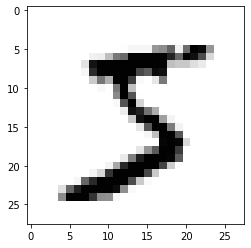

label: [5.]
(28, 28, 1)
(28, 28)


In [6]:
# troubleshoot data import

ind = 0

print('training data:', train_data.shape, '\n')

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(train_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', train_labels[ind])

print(train_data[ind].shape)
print(image.shape)

## Test data and labels

In [7]:
# open test set image file
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

num_test_images = 10000

f.read(16)
buf = f.read(image_rows * image_cols * num_test_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test_images, image_rows, image_cols,1)

In [8]:
# open test set label file

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(num_test_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_labels = test_labels.reshape(num_test_images,1)

test data: (10000, 28, 28, 1)
image index 0:


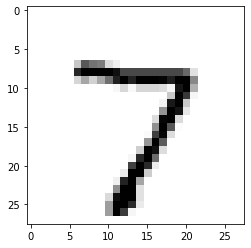

label: [7.]


In [9]:
# troubleshoot test data import

ind = 0

print('test data:', test_data.shape)

# print training image
print('image index ' + str(ind) + ':')
image = np.asarray(test_data[ind]).squeeze()
#plt.title(['image index', ind])
plt.imshow(image, cmap='Greys')
plt.show()
# print training label
print('label:', test_labels[ind])

# Least Sqaures Classification with Ridge Regression

In [10]:
# optimize best regularizer
lamdas = np.logspace(-5,4,num=10)
digits = np.array([0,1,2,3,4,5,6,7,8,9])

# normalize array and reshape into flattened image vectors
A = train_data.reshape(num_train_images, image_rows*image_cols)/255

# find best lamda for all binary classifiers
A_opt = A[:50000,:]
avg_error_rate_by_lamda = [0] * 10
print(A_opt.shape)

# for every lamda, get avg error rate over all digits
for lamda in lamdas:
    error_rate_by_digit = [0] * 10
    
    # get error rate for every digit
    for digit in digits:
        
        # train with first 50K
        d_opt = set_binary_labels_by_digit(train_labels[:50000,:], digit)
        w = np.linalg.inv(A_opt.T@A_opt+lamda*np.identity(A_opt.shape[1]))@A_opt.T@d_opt
        
        # evaluate classifier with last 10K
        d_eval = set_binary_labels_by_digit(train_labels[50000:,:], digit)
        d_hat_eval = np.sign(A[50000:,:]@w)
        errors = np.count_nonzero(d_eval-d_hat_eval!=0)
        #print(digit, errors)
        error_rate_by_digit[digit] = (errors/d_hat_eval.shape[0])
        
    print(lamda, np.average(error_rate_by_digit), error_rate_by_digit)
    avg_error_rate_by_lamda[int(math.log10(lamda)-math.log10(lamdas[0]))] = np.average(error_rate_by_digit)

#pick lamda with lowest avg error rate
print('\n', avg_error_rate_by_lamda)
lamda = lamdas[np.argmin(avg_error_rate_by_lamda)]

print(lamda)


(50000, 784)
1e-05 [0.0162, 0.0158, 0.0328, 0.0423, 0.0249, 0.0504, 0.0218, 0.0282, 0.0612, 0.0519]
0.034550000000000004
0.0001 [0.0162, 0.0158, 0.0327, 0.0423, 0.0248, 0.0503, 0.0218, 0.0282, 0.0612, 0.0519]
0.034519999999999995
0.001 [0.0162, 0.0158, 0.0327, 0.0422, 0.0249, 0.0502, 0.0218, 0.0281, 0.0612, 0.0519]
0.034499999999999996
0.01 [0.0163, 0.0159, 0.0327, 0.0422, 0.0248, 0.0503, 0.0218, 0.0279, 0.0613, 0.0518]
0.0345
0.1 [0.0162, 0.0157, 0.0326, 0.0422, 0.0248, 0.0501, 0.0215, 0.0279, 0.0613, 0.0516]
0.03439
1.0 [0.0162, 0.0156, 0.0325, 0.042, 0.025, 0.0501, 0.0214, 0.0278, 0.0614, 0.0515]
0.03435
10.0 [0.0161, 0.0155, 0.0327, 0.042, 0.0246, 0.05, 0.0214, 0.0276, 0.0614, 0.0519]
0.03432
100.0 [0.0156, 0.015, 0.0321, 0.0418, 0.0252, 0.0502, 0.0214, 0.0274, 0.0609, 0.0519]
0.03415
1000.0 [0.0163, 0.0144, 0.0315, 0.0412, 0.026, 0.0516, 0.0191, 0.0263, 0.0621, 0.052]
0.03405
10000.0 [0.019, 0.0143, 0.0395, 0.0465, 0.0387, 0.0693, 0.0214, 0.029, 0.0725, 0.0718]
0.04219999999999999

In [19]:
# train classifier with optimized regularizer


A_train = train_data.reshape(num_train_images, image_rows*image_cols)/255
A_test = test_data.reshape(num_test_images, image_rows*image_cols)/255

W = np.zeros((A_train.shape[1],len(digits)))
print(W.shape)

# train and test classifier for every digit
train_error_rate_by_digit = [0] * 10
test_error_rate_by_digit = [0] * 10

for digit in digits:

    # train classifier with optimized lamda and training data
    d_train = set_binary_labels_by_digit(train_labels, digit)
    W[:,digit:digit+1] = np.linalg.inv(A_train.T@A_train+lamda*np.identity(A_train.shape[1]))@A_train.T@d_train
    
    # find training error
    d_hat_train = np.sign(A_train@W[:,digit:digit+1])
    errors = np.count_nonzero(d_train-d_hat_train!=0)
    train_error_rate_by_digit[digit] = (errors/d_hat_train.shape[0])
    
    # test trained classifier with test data
    d_test = set_binary_labels_by_digit(test_labels, digit)
    d_hat_test = np.sign(A_test@W[:,digit:digit+1])
    errors = np.count_nonzero(d_test-d_hat_test!=0)
    test_error_rate_by_digit[digit] = (errors/d_hat_test.shape[0])
    
print('avg training error:', np.average(train_error_rate_by_digit))
print('avg test error:', np.average(test_error_rate_by_digit))




(784, 10)
avg training error: 0.037079999999999995
avg test error: 0.037
